In [2]:
# 1.读取数据
import pandas as pd
df = pd.read_excel('data/股票客户流失.xlsx')

# 2.划分特征变量和目标变量
X = df.drop(columns='是否流失') 
y = df['是否流失']

# 3.划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4.模型搭建
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# 5.模型使用1 - 预测数据结果
y_pred = model.predict(X_test)
print(y_pred[0:100])  # 打印预测内容的前100个看看

# 查看全部的预测准确度
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)  # 打印整体的预测准确度

# 6.模型使用2 - 预测概率
y_pred_proba = model.predict_proba(X_test)  
print(y_pred_proba[0:5])  # 打印前5个客户的分类概率

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1]
0.7977288857345636
[[0.82041491 0.17958509]
 [0.84029613 0.15970387]
 [0.79819342 0.20180658]
 [0.62989192 0.37010808]
 [0.61636611 0.38363389]]


In [3]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, y_pred)  # 传入预测值和真实值
print(m)

[[968  93]
 [192 156]]


In [4]:
a = pd.DataFrame(m, index=['0（实际不流失）', '1（实际流失）'], columns=['0（预测不流失）', '1（预测流失）'])
a

,0（预测不流失）,1（预测流失）
0（实际不流失）,968,93
1（实际流失）,192,156


In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  # 传入预测值和真实值

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1061
           1       0.63      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409



In [6]:
y_pred_proba[:,1]

array([0.17958509, 0.15970387, 0.20180658, ..., 0.04220544, 0.09782449,
       0.63586739])

In [7]:
# 1.计算ROC曲线需要的假警报率（fpr）、命中率（tpr）及阈值（thres）
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

In [8]:
# 2.查看假警报率（fpr）、命中率（tpr）及阈值（thres）
a = pd.DataFrame()  # 创建一个空DataFrame 
a['阈值'] = list(thres)
a['假警报率'] = list(fpr)
a['命中率'] = list(tpr)
a.head()

,阈值,假警报率,命中率
0,inf,0.000000,0.000000
1,0.930369,0.000000,0.002874
2,0.867342,0.000000,0.034483
3,0.864187,0.001885,0.034483
4,0.857303,0.001885,0.040230


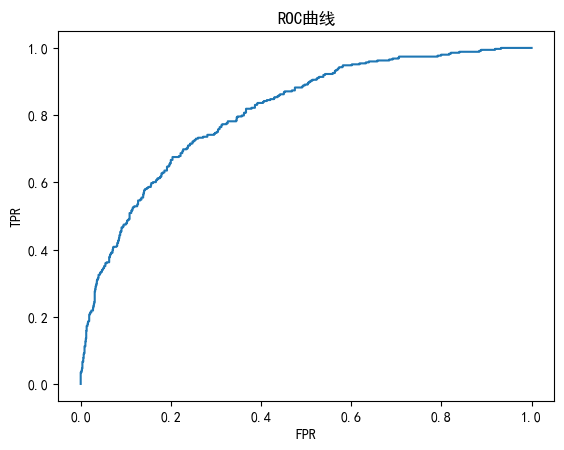

In [9]:
# 3.绘制ROC曲线
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文
plt.plot(fpr, tpr)  # 通过plot()函数绘制折线图
plt.title('ROC曲线')  # 添加标题，注意如果要写中文，需要在之前添加一行代码：plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('FPR')  # 添加X轴标签
plt.ylabel('TPR')  # 添加Y轴标
plt.show()

In [10]:
# 4.求出模型的AUC值
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
score

0.8103854528908967

In [11]:
max(y_pred_proba[:,1])

0.9303686064592213

In [12]:
a = pd.DataFrame(y_pred_proba, columns=['分类为0概率', '分类为1概率'])
a = a.sort_values('分类为1概率', ascending=False)
a.head(15)

,分类为0概率,分类为1概率
326,0.069631,0.930369
366,0.085373,0.914627
662,0.092923,0.907077
1154,0.105118,0.894882
1036,0.105906,0.894094
1093,0.111303,0.888697
1164,0.115550,0.884450
891,0.116594,0.883406
437,0.123060,0.876940
1153,0.127293,0.872707


In [13]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

In [14]:
a = pd.DataFrame()  # 创建一个空DataFrame 
a['阈值'] = list(thres)
a['假警报率'] = list(fpr)
a['命中率'] = list(tpr)
a.head()

,阈值,假警报率,命中率
0,inf,0.000000,0.000000
1,0.930369,0.000000,0.002874
2,0.867342,0.000000,0.034483
3,0.864187,0.001885,0.034483
4,0.857303,0.001885,0.040230


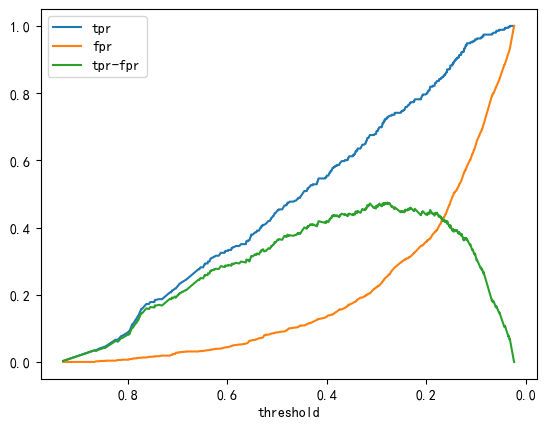

In [15]:
plt.plot(thres[1:], tpr[1:])
plt.plot(thres[1:], fpr[1:])
plt.plot(thres[1:], tpr[1:] - fpr[1:])
plt.xlabel('threshold')
plt.legend(['tpr', 'fpr', 'tpr-fpr'])
plt.gca().invert_xaxis() 
plt.show()

In [16]:
# KS值对应的阈值
a['TPR-FPR'] = a['命中率'] - a['假警报率']
a.head()

,阈值,假警报率,命中率,TPR-FPR
0,inf,0.000000,0.000000,0.000000
1,0.930369,0.000000,0.002874,0.002874
2,0.867342,0.000000,0.034483,0.034483
3,0.864187,0.001885,0.034483,0.032598
4,0.857303,0.001885,0.040230,0.038345


In [17]:
# 另外一种获取KS值的方式
max(a['TPR-FPR'])

0.4744656418256471

In [18]:
# 获取KS值对应的阈值等信息
a[a['TPR-FPR'] == max(a['TPR-FPR'])]

,阈值,假警报率,命中率,TPR-FPR
224,0.27769,0.255419,0.729885,0.474466
